In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyperclip as ppc

from scipy.stats import linregress

%matplotlib inline

In [62]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


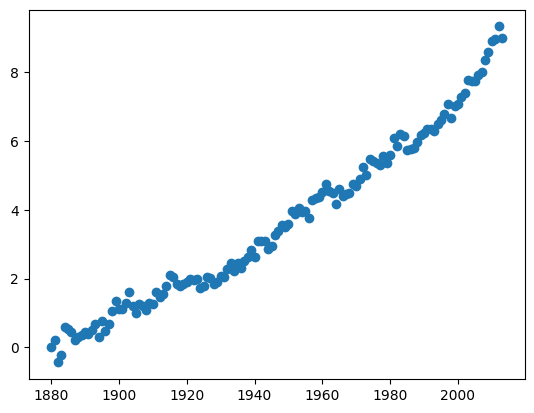

In [63]:
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

plt.plot(x, y,"o", label="original data")

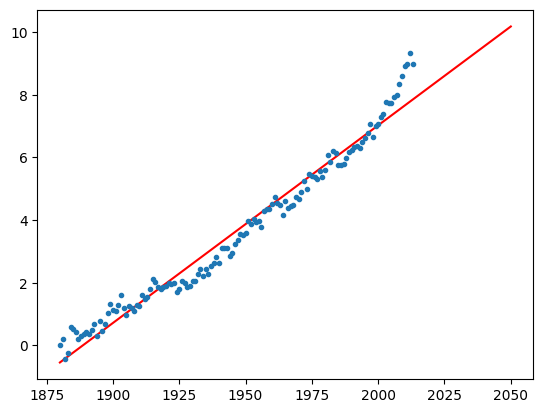

In [64]:
res1 = linregress(x, y) # from 19th century data through present
x_2050 = x.to_list()
x_2050.extend(list(range(2014, 2051)))
x_2050 = pd.Series(x_2050)
plt.plot(x_2050, res1.intercept + res1.slope * x_2050, "r", label="line of best fit")
plt.plot(x, y, "o", markersize=3, label="original data")

In [65]:
x

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, Length: 134, dtype: int64

In [66]:
x_2050 = x.to_list().copy()
x_2050.extend([year for year in range(2014, 2051)])
x_2050 = pd.Series(x_2050)
x_2050

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64

In [67]:
x_2000 = x[x > 1999]
first = x_2000.index[0]
for i in range(first, 130):
    print(i)

120
121
122
123
124
125
126
127
128
129


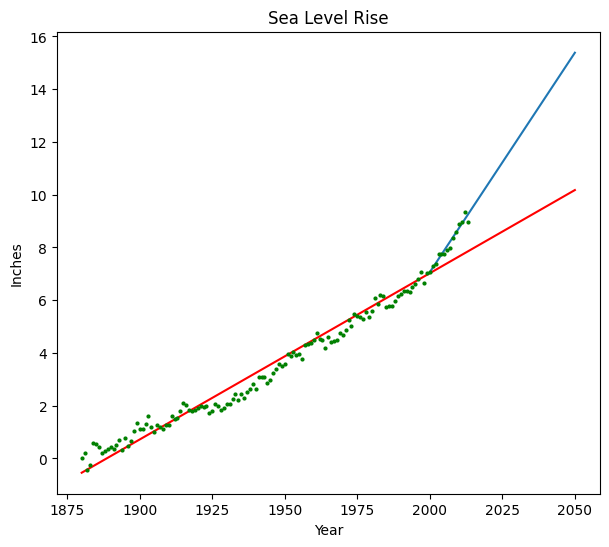

In [68]:
res2 = linregress(x[x > 1999], y.iloc[120:])
plt.figure(figsize=(7, 6))
x_2000 = x_2050[x_2050 > 1999]
plt.plot(x_2000, res2.intercept + res2.slope * x_2000)
plt.plot(x_2050, res1.intercept + res1.slope * x_2050, "r", label="line of best fit")
plt.plot(x, y, "o", markersize=2, color="g", label="original data")
plt.xlabel("Year")
plt.ylabel("Inches")
plt.title("Sea Level Rise")
plt.show()

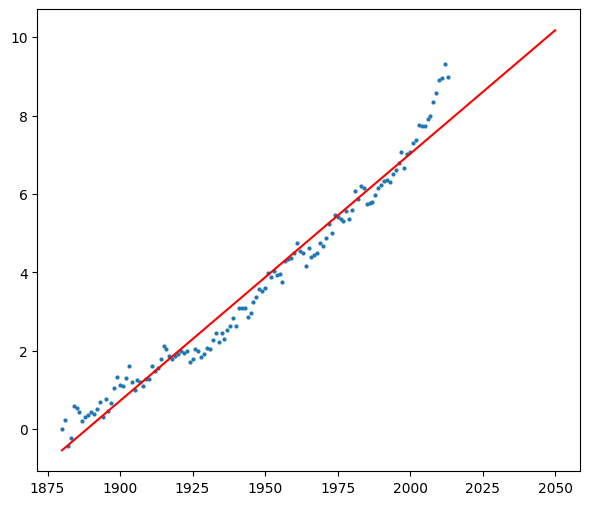

In [69]:
# Create scatter plot
plt.figure(figsize=(7, 6))
plt.plot(x, y, "o", markersize=2)

# Create first line of best fit
res1 = linregress(x, y)
x_2050 = x.to_list().copy()
x_2050.extend([year for year in range(2014, 2051)])
x_2050 = pd.Series(x_2050)

plt.plot(x_2050, res1.intercept + res1.slope * x_2050, color="r")

ax = plt.gca()
plt.show()

In [70]:
xarr = ax.get_children()[0].get_data()[0]
yarr = ax.get_children()[0].get_data()[1]
print(xarr, "\n", yarr)
ppc.copy(ax.get_children()[0].get_data())


[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013] 
 [ 0.          0.22047244 -0.44094488 -0.23228346  0.59055118  0.53149606
  0.43700787  0.21653543  0.2992126   0.36220472  0.44094488  0.37401575
  0.5         0.68503937  0.30314961  0.76771654  0.46850394  0.67322835
  1.04330709  1.33858268  1.12598425  1.11023622  1.29133858  1.60629921
  1.2007874   0.98425197 

In [57]:
xlist = list(xarr.astype(int))
ylist = list(yarr.astype(int))


[np.int64(1880),
 np.int64(1881),
 np.int64(1882),
 np.int64(1883),
 np.int64(1884),
 np.int64(1885),
 np.int64(1886),
 np.int64(1887),
 np.int64(1888),
 np.int64(1889),
 np.int64(1890),
 np.int64(1891),
 np.int64(1892),
 np.int64(1893),
 np.int64(1894),
 np.int64(1895),
 np.int64(1896),
 np.int64(1897),
 np.int64(1898),
 np.int64(1899),
 np.int64(1900),
 np.int64(1901),
 np.int64(1902),
 np.int64(1903),
 np.int64(1904),
 np.int64(1905),
 np.int64(1906),
 np.int64(1907),
 np.int64(1908),
 np.int64(1909),
 np.int64(1910),
 np.int64(1911),
 np.int64(1912),
 np.int64(1913),
 np.int64(1914),
 np.int64(1915),
 np.int64(1916),
 np.int64(1917),
 np.int64(1918),
 np.int64(1919),
 np.int64(1920),
 np.int64(1921),
 np.int64(1922),
 np.int64(1923),
 np.int64(1924),
 np.int64(1925),
 np.int64(1926),
 np.int64(1927),
 np.int64(1928),
 np.int64(1929),
 np.int64(1930),
 np.int64(1931),
 np.int64(1932),
 np.int64(1933),
 np.int64(1934),
 np.int64(1935),
 np.int64(1936),
 np.int64(1937),
 np.int64(1938

In [56]:
pairs = zip(xlist, ylist)
pairs = list(pairs)
pairs

[(np.int64(1880), np.int64(0)),
 (np.int64(1881), np.int64(0)),
 (np.int64(1882), np.int64(0)),
 (np.int64(1883), np.int64(0)),
 (np.int64(1884), np.int64(0)),
 (np.int64(1885), np.int64(0)),
 (np.int64(1886), np.int64(0)),
 (np.int64(1887), np.int64(0)),
 (np.int64(1888), np.int64(0)),
 (np.int64(1889), np.int64(0)),
 (np.int64(1890), np.int64(0)),
 (np.int64(1891), np.int64(0)),
 (np.int64(1892), np.int64(0)),
 (np.int64(1893), np.int64(0)),
 (np.int64(1894), np.int64(0)),
 (np.int64(1895), np.int64(0)),
 (np.int64(1896), np.int64(0)),
 (np.int64(1897), np.int64(0)),
 (np.int64(1898), np.int64(1)),
 (np.int64(1899), np.int64(1)),
 (np.int64(1900), np.int64(1)),
 (np.int64(1901), np.int64(1)),
 (np.int64(1902), np.int64(1)),
 (np.int64(1903), np.int64(1)),
 (np.int64(1904), np.int64(1)),
 (np.int64(1905), np.int64(0)),
 (np.int64(1906), np.int64(1)),
 (np.int64(1907), np.int64(1)),
 (np.int64(1908), np.int64(1)),
 (np.int64(1909), np.int64(1)),
 (np.int64(1910), np.int64(1)),
 (np.int

In [44]:
pairs_list = []
for pair in pairs:
    pair = list(pair)
    pairs_list.append(pair)

pairs_list

[[np.int64(1880), np.float64(0.0)],
 [np.int64(1881), np.float64(0.220472441)],
 [np.int64(1882), np.float64(-0.440944881)],
 [np.int64(1883), np.float64(-0.232283464)],
 [np.int64(1884), np.float64(0.590551181)],
 [np.int64(1885), np.float64(0.531496062)],
 [np.int64(1886), np.float64(0.437007874)],
 [np.int64(1887), np.float64(0.216535433)],
 [np.int64(1888), np.float64(0.299212598)],
 [np.int64(1889), np.float64(0.362204724)],
 [np.int64(1890), np.float64(0.440944881)],
 [np.int64(1891), np.float64(0.374015748)],
 [np.int64(1892), np.float64(0.499999999)],
 [np.int64(1893), np.float64(0.685039369)],
 [np.int64(1894), np.float64(0.303149606)],
 [np.int64(1895), np.float64(0.767716535)],
 [np.int64(1896), np.float64(0.468503937)],
 [np.int64(1897), np.float64(0.673228346)],
 [np.int64(1898), np.float64(1.043307086)],
 [np.int64(1899), np.float64(1.338582676)],
 [np.int64(1900), np.float64(1.125984251)],
 [np.int64(1901), np.float64(1.110236219)],
 [np.int64(1902), np.float64(1.2913385